In [ ]:
一

In [1]:
#【实验6.1】步骤一：获得数据。
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
 
# 客户存款、年龄数据集
dataset=pd.read_csv('Customer_Info.csv')
X=dataset.iloc[: , [4,3]].values
X

array([[7.92720e+04, 8.20000e+01],
       [1.16475e+05, 2.10000e+01],
       [6.79650e+04, 4.10000e+01],
       [5.41328e+04, 5.80000e+01],
       [1.74000e+03, 4.40000e+01],
       [5.94000e+04, 5.70000e+01],
       [6.71500e+03, 8.40000e+01],
       [5.36280e+04, 6.80000e+01],
       [0.00000e+00, 3.50000e+01],
       [0.00000e+00, 4.70000e+01],
       [2.51400e+04, 3.30000e+01],
       [0.00000e+00, 3.70000e+01],
       [0.00000e+00, 5.30000e+01],
       [0.00000e+00, 5.90000e+01],
       [0.00000e+00, 2.10000e+01],
       [0.00000e+00, 4.10000e+01],
       [1.50000e+04, 5.90000e+01],
       [3.80640e+03, 5.80000e+01],
       [8.09010e+04, 4.10000e+01],
       [2.61732e+04, 6.90000e+01],
       [1.44300e+04, 6.40000e+01],
       [1.21950e+04, 3.60000e+01],
       [2.66950e+04, 7.20000e+01],
       [3.84650e+04, 3.70000e+01],
       [3.11950e+04, 7.60000e+01],
       [7.44700e+03, 6.40000e+01],
       [1.52440e+04, 5.60000e+01],
       [9.00000e+00, 6.40000e+01],
       [1.18710e+04,

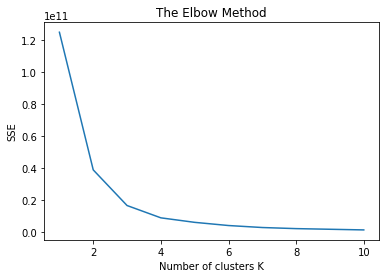

In [2]:
#【实验6.2】步骤二： 使用肘部方法找到最优的簇数。
from sklearn.cluster import KMeans
sumDS = []
for i in range(1, 11): 
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(X)
    sumDS.append(kmeans.inertia_) #样本到簇中心的距离平方和
    #print(kmeans.inertia_)  #数值为10的11次方-le11
plt.plot(range(1, 11),sumDS)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters K')
plt.ylabel('SSE')  
plt.show()  

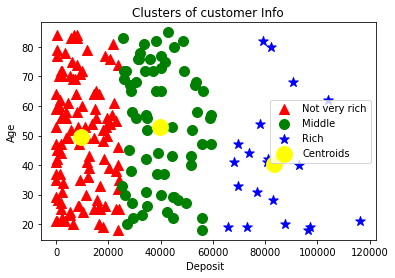

In [3]:
#【实验6.3】步骤三：在数据集上使用k=3进行聚类。
kmeans=KMeans(n_clusters=3, init='k-means++', max_iter= 300, n_init= 10, random_state= 0)
y_kmeans=kmeans.fit_predict(X)
 
# 集群可视化
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, marker='^', c = 'red', label='Not very rich')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, marker='o', c = 'green', label='Middle')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, marker='*', c = 'blue', label='Rich')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 250, c = 'yellow', 
            label='Centroids')
plt.title('Clusters of customer Info')
plt.xlabel('Deposit  ')
plt.ylabel('Age')
plt.legend()
plt.show()

In [ ]:
二

In [5]:
from sklearn.datasets import fetch_lfw_people
people=fetch_lfw_people(min_faces_per_person=20,resize=0.7)
print(people.target)         # 人物标记
print(people.target_names)   # 人物名
print(people['data'].shape)    # 数据形状
print(people['target'].shape)   # 标记形状

[ 7 34  8 ... 10 12 10]
['Alejandro Toledo' 'Alvaro Uribe' 'Amelie Mauresmo' 'Andre Agassi'
 'Ariel Sharon' 'Atal Bihari Vajpayee' 'Bill Clinton' 'Colin Powell'
 'Donald Rumsfeld' 'George Robertson' 'George W Bush' 'Gerhard Schroeder'
 'Gloria Macapagal Arroyo' 'Hamid Karzai' 'Hans Blix' 'Hugo Chavez'
 'Igor Ivanov' 'Jack Straw' 'Jacques Chirac' 'Jean Chretien'
 'Jennifer Aniston' 'Jennifer Capriati' 'John Ashcroft'
 'Juan Carlos Ferrero' 'Junichiro Koizumi' 'Kofi Annan' 'Laura Bush'
 'Lindsay Davenport' 'Lleyton Hewitt' 'Megawati Sukarnoputri'
 'Michael Bloomberg' 'Pete Sampras' 'Rudolph Giuliani' 'Saddam Hussein'
 'Serena Williams' 'Tiger Woods' 'Tom Daschle' 'Tom Ridge' 'Tony Blair'
 'Vicente Fox' 'Vladimir Putin']
(2432, 5655)
(2432,)


(87, 65)
Number of classes: 41
shape of targetss: (2432,)


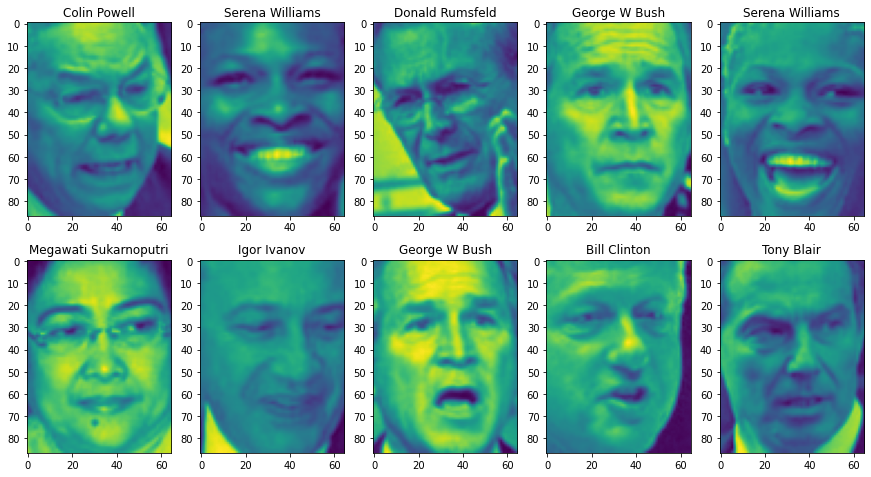

In [6]:
import matplotlib
import matplotlib.pyplot as plt

image_shape = people.images[0].shape
print(image_shape)
print("Number of classes:",len(people.target_names))
print("shape of targetss:",people.target.shape)

fig, axes = plt.subplots(2, 5, figsize=(15, 8))
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [7]:
import numpy as np
# 统计每个标记数量
counts = np.bincount(people.target)
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end='   ')
    if (i + 1) % 4 == 0:
        print()

Alejandro Toledo           39   Alvaro Uribe               35   Amelie Mauresmo            21   Andre Agassi               36   
Ariel Sharon               77   Atal Bihari Vajpayee       24   Bill Clinton               29   Colin Powell              236   
Donald Rumsfeld           121   George Robertson           22   George W Bush             530   Gerhard Schroeder         109   
Gloria Macapagal Arroyo    44   Hamid Karzai               22   Hans Blix                  39   Hugo Chavez                71   
Igor Ivanov                20   Jack Straw                 28   Jacques Chirac             52   Jean Chretien              55   
Jennifer Aniston           21   Jennifer Capriati          42   John Ashcroft              53   Juan Carlos Ferrero        28   
Junichiro Koizumi          60   Kofi Annan                 32   Laura Bush                 41   Lindsay Davenport          22   
Lleyton Hewitt             41   Megawati Sukarnoputri      33   Michael Bloomberg          20   P

C:\Users\q1425\AppData\Local\Temp\ipykernel_15904\1452199360.py:22: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  image = np.array(im).astype(np.float) / 255


聚类结果:
 [0 0 0 ... 0 0 0]
聚类中心:
 [[0.14301307 0.16310189 0.07402127]
 [0.70393039 0.63219624 0.58215422]]


TypeError: tight_layout() takes 0 positional arguments but 1 was given

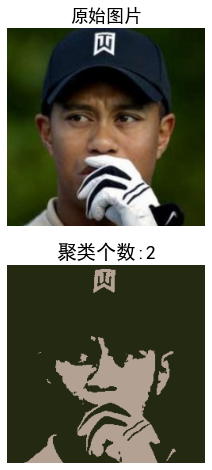

In [8]:
# -*- coding: utf-8 -*-
from PIL import Image
import numpy as np
from sklearn.cluster import KMeans
import matplotlib
import matplotlib.pyplot as plt

def restore_image(cb, cluster, shape):
    row, col, dummy = shape
    image = np.empty((row, col, dummy))
    for r in range(row):
        for c in range(col):
            image[r, c] = cb[cluster[r * col + c]]
    return image
   
if __name__ == '__main__':
    matplotlib.rcParams['font.sans-serif'] = [u'SimHei']
    matplotlib.rcParams['axes.unicode_minus'] = False
    # 聚类数2,6,30
    num_vq = 2
    im = Image.open('Tiger_Woods_0023.jpg')
    image = np.array(im).astype(np.float) / 255
    image = image[:, :, :3]
    image_v = image.reshape((-1, 3))
    kmeans = KMeans(n_clusters=num_vq, init='k-means++')    
    
    N = image_v.shape[0]  # 图像像素总数
    # 选择样本，计算聚类中心
    idx = np.random.randint(0, N, size=int(N * 0.7))
    image_sample = image_v[idx]
    kmeans.fit(image_sample)
    result = kmeans.predict(image_v)  # 聚类结果
    print('聚类结果:\n', result)
    print('聚类中心:\n', kmeans.cluster_centers_)
    
    plt.figure(figsize=(15, 8), facecolor='w')
    plt.subplot(211)
    plt.axis('off')
    plt.title(u'原始图片', fontsize=18)
    plt.imshow(image)
    # 可以使用plt.savefig('原始图片.png') ，保存原始图片并对比
    
    plt.subplot(212)
    vq_image = restore_image(kmeans.cluster_centers_, result, image.shape)
    plt.axis('off')
    plt.title(u'聚类个数:%d' % num_vq, fontsize=20)
    plt.imshow(vq_image)
    # 可以使用plt.savefig('矢量化图片.png')，保存处理后的图片并对比
    
    plt.tight_layout(1.2)
    plt.show()
